# Exercise 2

Work on this before the next lecture on 24 April. We will talk about questions, comments, and solutions during the exercise after the third lecture.

Please do form study groups! When you do, make sure you can explain everything in your own words, do not simply copy&paste from others.

The solutions to a lot of these problems can probably be found with Google. Please don't. You will not learn a lot by copy&pasting from the internet.

If you want to get credit/examination on this course please upload your work to **your GitHub repository** for this course **before** the next lecture starts and post a link to your repository [in this thread](https://github.com/wildtreetech/advanced-comp-2017/issues/3). If you worked on things together with others please add their names to the notebook so we can see who formed groups.

---

These are some useful default imports for plotting and [`numpy`](http://www.numpy.org/)

In [97]:
%config InlineBackend.figure_format='retina'
%matplotlib inline

import numpy as np
np.random.seed(123)
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (8, 8)
plt.rcParams["font.size"] = 14
from sklearn.utils import check_random_state

## Question 1

Correlation between trees. This question is about investigating the correlation between decision trees and how this effects an ensemble constructed from them. There are three methods
for adding randomisation to the tree growing process:

1. grow each tree on a bootstrap sample
2. for each tree select a subset of features at random
3. pick the best random split point

You can use `RandomForestClassifier`, `BaggingClassifier`, and `ExtraTreesClassifier` to achieve various different sets of the above three strategies.

Show how the average amount of correlation between the trees in the ensemble varies as a function of bootstrap yes/no, number of `max_features`, and picking the best split point at random or not.

Pick one of the classification datasets from http://scikit-learn.org/stable/modules/classes.html#module-sklearn.datasets.

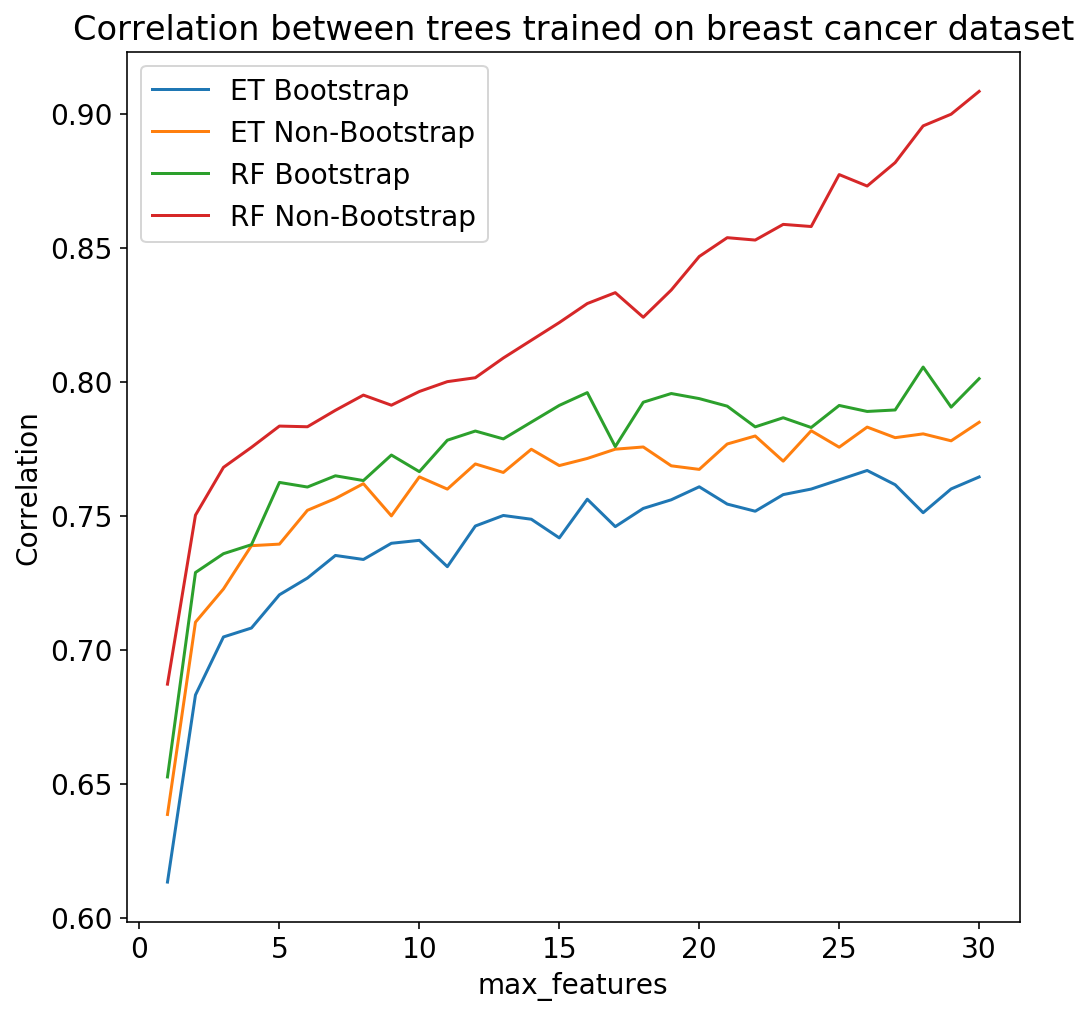

In [107]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesClassifier, BaggingClassifier, RandomForestClassifier

n_samples = 400
n_estimators = 100

X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5, random_state=42)

ETcorrelation = {'nonbootstrap':[], 'bootstrap':[]}
RFcorrelation = {'nonbootstrap':[], 'bootstrap':[]}
for k in range(1, X.shape[1]+1):
    clf = ExtraTreesClassifier(n_estimators=n_estimators, bootstrap=False, max_features=k)
    clf.fit(X_train, y_train)
    tree_predictions = []
    for tree in clf.estimators_:
        tree_predictions.append(tree.predict(X_test))
    corr = np.corrcoef(tree_predictions)
    ETcorrelation['nonbootstrap'].append(np.mean(corr[np.triu_indices_from(corr, 1)]))
    
    clf = ExtraTreesClassifier(n_estimators=n_estimators, bootstrap=True, max_features=k)
    clf.fit(X_train, y_train)
    tree_predictions = []
    for tree in clf.estimators_:
        tree_predictions.append(tree.predict(X_test))
    corr = np.corrcoef(tree_predictions)
    ETcorrelation['bootstrap'].append(np.mean(corr[np.triu_indices_from(corr, 1)]))
    
    clf = RandomForestClassifier(n_estimators=n_estimators, bootstrap=False, max_features=k)
    clf.fit(X_train, y_train)
    tree_predictions = []
    for tree in clf.estimators_:
        tree_predictions.append(tree.predict(X_test))
    corr = np.corrcoef(tree_predictions)
    RFcorrelation['nonbootstrap'].append(np.mean(corr[np.triu_indices_from(corr, 1)]))
    
    clf = RandomForestClassifier(n_estimators=n_estimators, bootstrap=True, max_features=k)
    clf.fit(X_train, y_train)
    tree_predictions = []
    for tree in clf.estimators_:
        tree_predictions.append(tree.predict(X_test))
    corr = np.corrcoef(tree_predictions)
    RFcorrelation['bootstrap'].append(np.mean(corr[np.triu_indices_from(corr, 1)]))
    
plt.plot(range(1, X.shape[1]+1), ETcorrelation['bootstrap'], label='ET Bootstrap')
plt.plot(range(1, X.shape[1]+1), ETcorrelation['nonbootstrap'], label='ET Non-Bootstrap')
plt.plot(range(1, X.shape[1]+1), RFcorrelation['bootstrap'], label='RF Bootstrap')
plt.plot(range(1, X.shape[1]+1), RFcorrelation['nonbootstrap'], label='RF Non-Bootstrap')
plt.xlabel("max_features")
plt.ylabel("Correlation")
plt.title('Correlation between trees trained on breast cancer dataset')
plt.legend(loc='best');

---

## Question 2

Compare the feature importances calculated by a `RandomForestClassifier`, `ExtraTreesClassifier` and `GradientBoostedTreesClassifier` on the digits dataset. You might have to tune `n_estimators` to get good performance. Which parts of the images is the most important and do you agree with the interpretation of the classifiers? (Bonus) Do the importances change if you change to problem to be a classification problem of odd vs even digit?

You can load the data set with: http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html#sklearn.datasets.load_digits

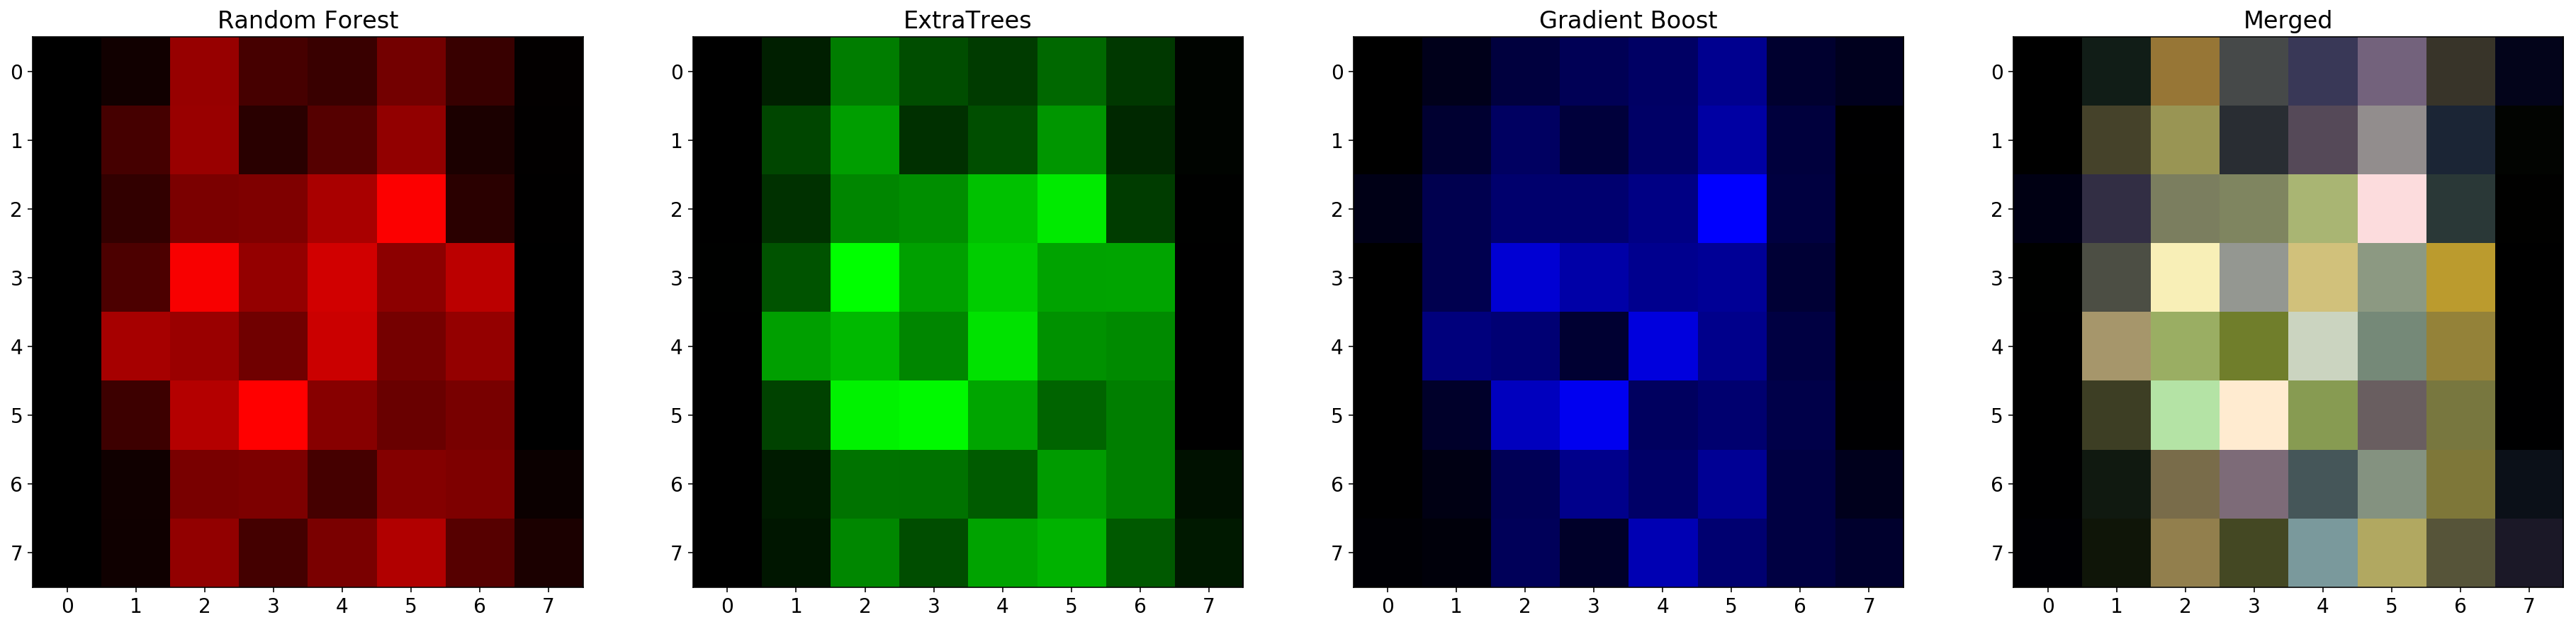

In [108]:
from sklearn.datasets import load_digits
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split

digits = load_digits()
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, train_size=0.5, random_state=42)

# For all 3 types of classifier, the mean score does not improve noticably beyond ~125
# (See cell below for testing code example)
rfclf = RandomForestClassifier(n_estimators=125)
rfclf.fit(X_train, y_train)
etclf = ExtraTreesClassifier(n_estimators=125)
etclf.fit(X_train, y_train)
gbclf = GradientBoostingClassifier(n_estimators=125)
gbclf.fit(X_train, y_train)

feature_importances = np.stack(((rfclf.feature_importances_.reshape(digits.images[0].shape)),
                                (etclf.feature_importances_.reshape(digits.images[0].shape)),
                                (gbclf.feature_importances_.reshape(digits.images[0].shape))), axis=2)

fig, axs = plt.subplots(1, 4, figsize=(4*8, 8))

axs[0].imshow(np.stack((feature_importances[:,:,0]/np.max(feature_importances[:,:,0]),
                        np.zeros(digits.images[0].shape),
                        np.zeros(digits.images[0].shape)), axis=2))
axs[0].set_title('Random Forest')
axs[1].imshow(np.stack((np.zeros(digits.images[0].shape),
                        feature_importances[:,:,1]/np.max(feature_importances[:,:,1]),
                        np.zeros(digits.images[0].shape)), axis=2))
axs[1].set_title('ExtraTrees')
axs[2].imshow(np.stack((np.zeros(digits.images[0].shape),
                        np.zeros(digits.images[0].shape),
                        feature_importances[:,:,2]/np.max(feature_importances[:,:,2])), axis=2))
axs[2].set_title('Gradient Boost')
axs[3].imshow(feature_importances/np.max(feature_importances))
axs[3].set_title('Merged');

#### Which parts of the images is the most important and do you agree with the interpretation of the classifiers?

Globally, the center is more important than the edges. The first and last column are all but ignored. This seems to be due to the fact that digits tend to be vertically stretched (higher than wider), whereas the images are square. The top center of the image is less important since most digits will cover these areas, making them less usefull to distinguish between them.

In [109]:
# Example code to examine accuracy of gradient boosting classifier
for k in range(25, 201, 25):
    score = []
    for i in range(20):
        clf = GradientBoostingClassifier(n_estimators=k)
        clf.fit(X_train, y_train)
        score.append(clf.score(X_test, y_test))
    print('Score with %i estimators:'%k, np.mean(score))

Score with 25 estimators: 0.915127919911
Score with 50 estimators: 0.935038932147
Score with 75 estimators: 0.943937708565
Score with 100 estimators: 0.947552836485
Score with 125 estimators: 0.948053392659
Score with 150 estimators: 0.948053392659
Score with 175 estimators: 0.948275862069
Score with 200 estimators: 0.948442714127


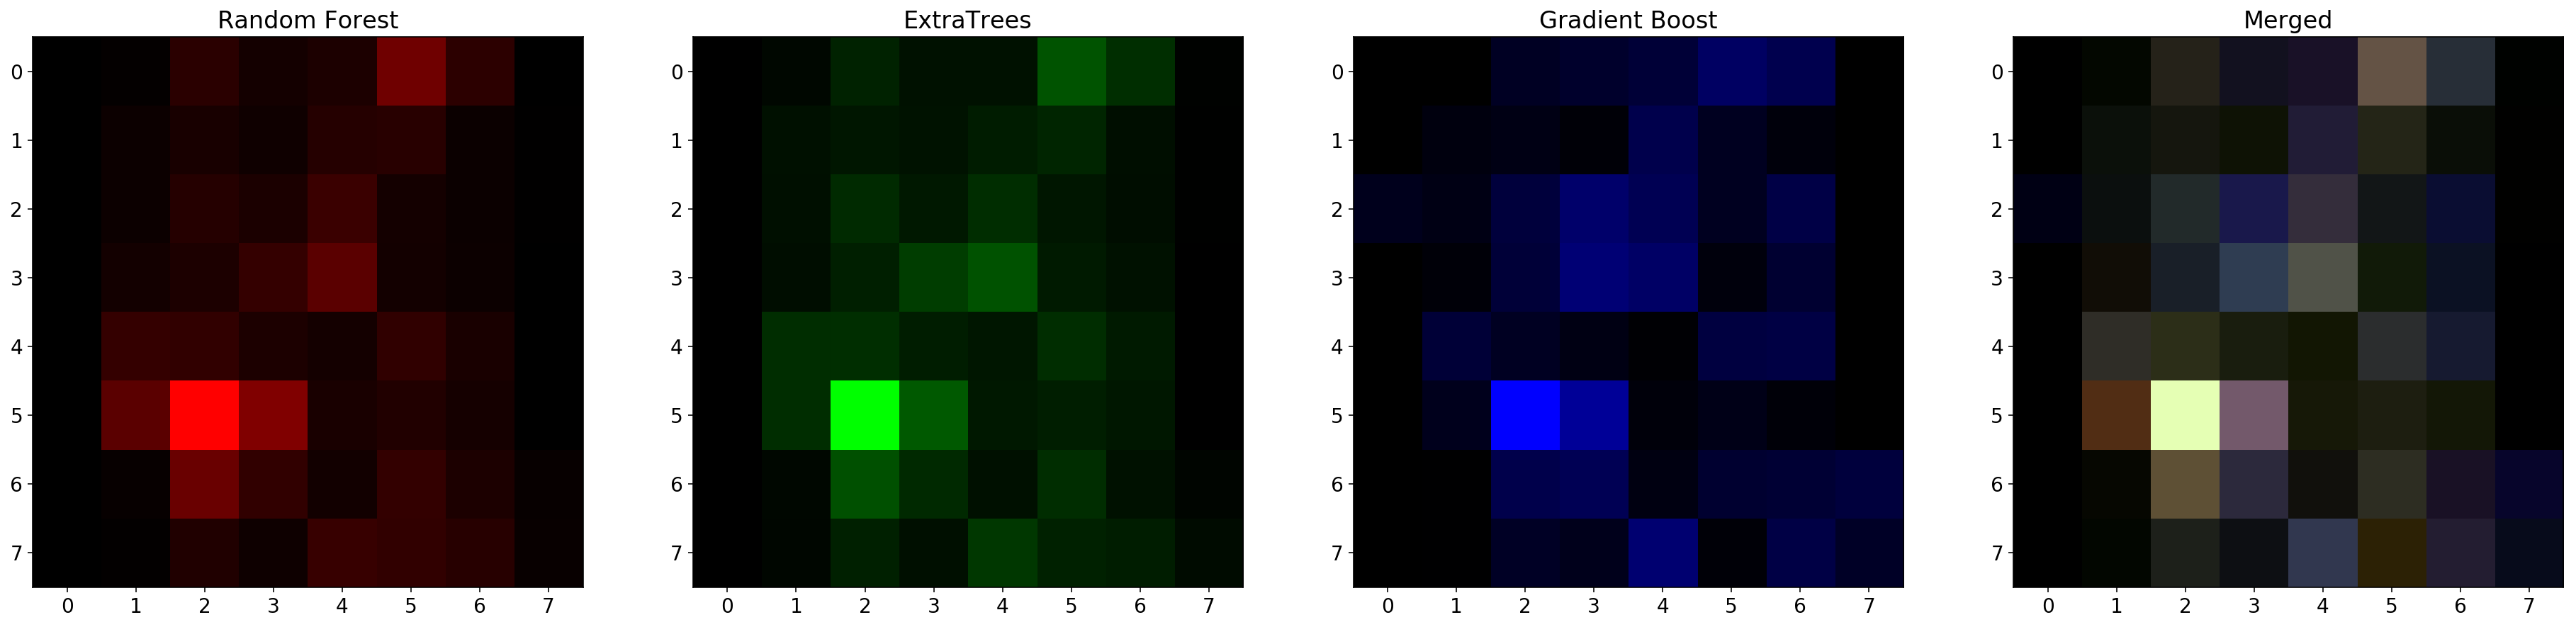

In [110]:
from sklearn.datasets import load_digits
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split

digits = load_digits()
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target%2 == 0, train_size=0.5,
                                                    random_state=42)

rfclf = RandomForestClassifier(n_estimators=125)
rfclf.fit(X_train, y_train)
etclf = ExtraTreesClassifier(n_estimators=125)
etclf.fit(X_train, y_train)
gbclf = GradientBoostingClassifier(n_estimators=125)
gbclf.fit(X_train, y_train)

feature_importances = np.stack(((rfclf.feature_importances_.reshape(digits.images[0].shape)),
                                (etclf.feature_importances_.reshape(digits.images[0].shape)),
                                (gbclf.feature_importances_.reshape(digits.images[0].shape))), axis=2)

fig, axs = plt.subplots(1, 4, figsize=(4*8, 8))

axs[0].imshow(np.stack((feature_importances[:,:,0]/np.max(feature_importances[:,:,0]),
                        np.zeros(digits.images[0].shape),
                        np.zeros(digits.images[0].shape)), axis=2))
axs[0].set_title('Random Forest')
axs[1].imshow(np.stack((np.zeros(digits.images[0].shape),
                        feature_importances[:,:,1]/np.max(feature_importances[:,:,1]),
                        np.zeros(digits.images[0].shape)), axis=2))
axs[1].set_title('ExtraTrees')
axs[2].imshow(np.stack((np.zeros(digits.images[0].shape),
                        np.zeros(digits.images[0].shape),
                        feature_importances[:,:,2]/np.max(feature_importances[:,:,2])), axis=2))
axs[2].set_title('Gradient Boost')
axs[3].imshow(feature_importances/np.max(feature_importances))
axs[3].set_title('Merged');

#### Do the importances change if you change to problem to be a classification problem of odd vs even digit?

Quite clearly yes. Most of the classification appears to be made using a single pixel at row 5 column 2.

---

## Question 3

This is a regression problem. Use a gradient boosted tree regressor (tune the `max_depth`, `learning_rate` and `n_estimators` parameters) to study the importance of the different features as well as the partial dependence of the output on individual features as well as pairs of features.

* can you identify uninformative features?
* how do the interactions between the features show up in the partial dependence plots?

(Help: `rgr = GradientBoostingRegressor(n_estimators=200, max_depth=2, learning_rate=0.1)
` seems to work quite well)
(Help: to produce 1D and 2D partial dependence plots pass `[0,1, (0,1)]` as the `features` argument of `plot_partial_dependence`. More details in the function's documentation.)


In [111]:
from sklearn.ensemble import GradientBoostingRegressor


def make_data(n_samples=10000, n_features=8, noise=0.2, random_state=2):
    generator = check_random_state(random_state)

    X = generator.rand(n_samples, n_features)
    y = 10 * (X[:, 0] * X[:, 1]) + 20 * (X[:, 2] - 0.5) ** 2 \
        + 10 * X[:, 3] + 10 * X[:, 4] + noise * generator.randn(n_samples)

    return X, y

X,y = make_data()

In [112]:
from sklearn.ensemble.partial_dependence import plot_partial_dependence

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5, random_state=42)
rgr = GradientBoostingRegressor(n_estimators=200, max_depth=2, learning_rate=0.1)
rgr.fit(X_train, y_train)
print(rgr.feature_importances_)

[ 0.16489566  0.18127496  0.24762616  0.2012803   0.20426199  0.00066092
  0.          0.        ]


#### Can you identify uninformative features?

We can see that the first 5 features are much more informative than the other 3 by the importance of those features in the estimator: The first five are all above 0.16, whereas the others are close to zero. This is what we expect, since the data generation only takes these first 5 features when calculating the outcome `y`, the remaining features being uninformative. (I increased the number of samples for the next question, where interactions are clearer with more samples).

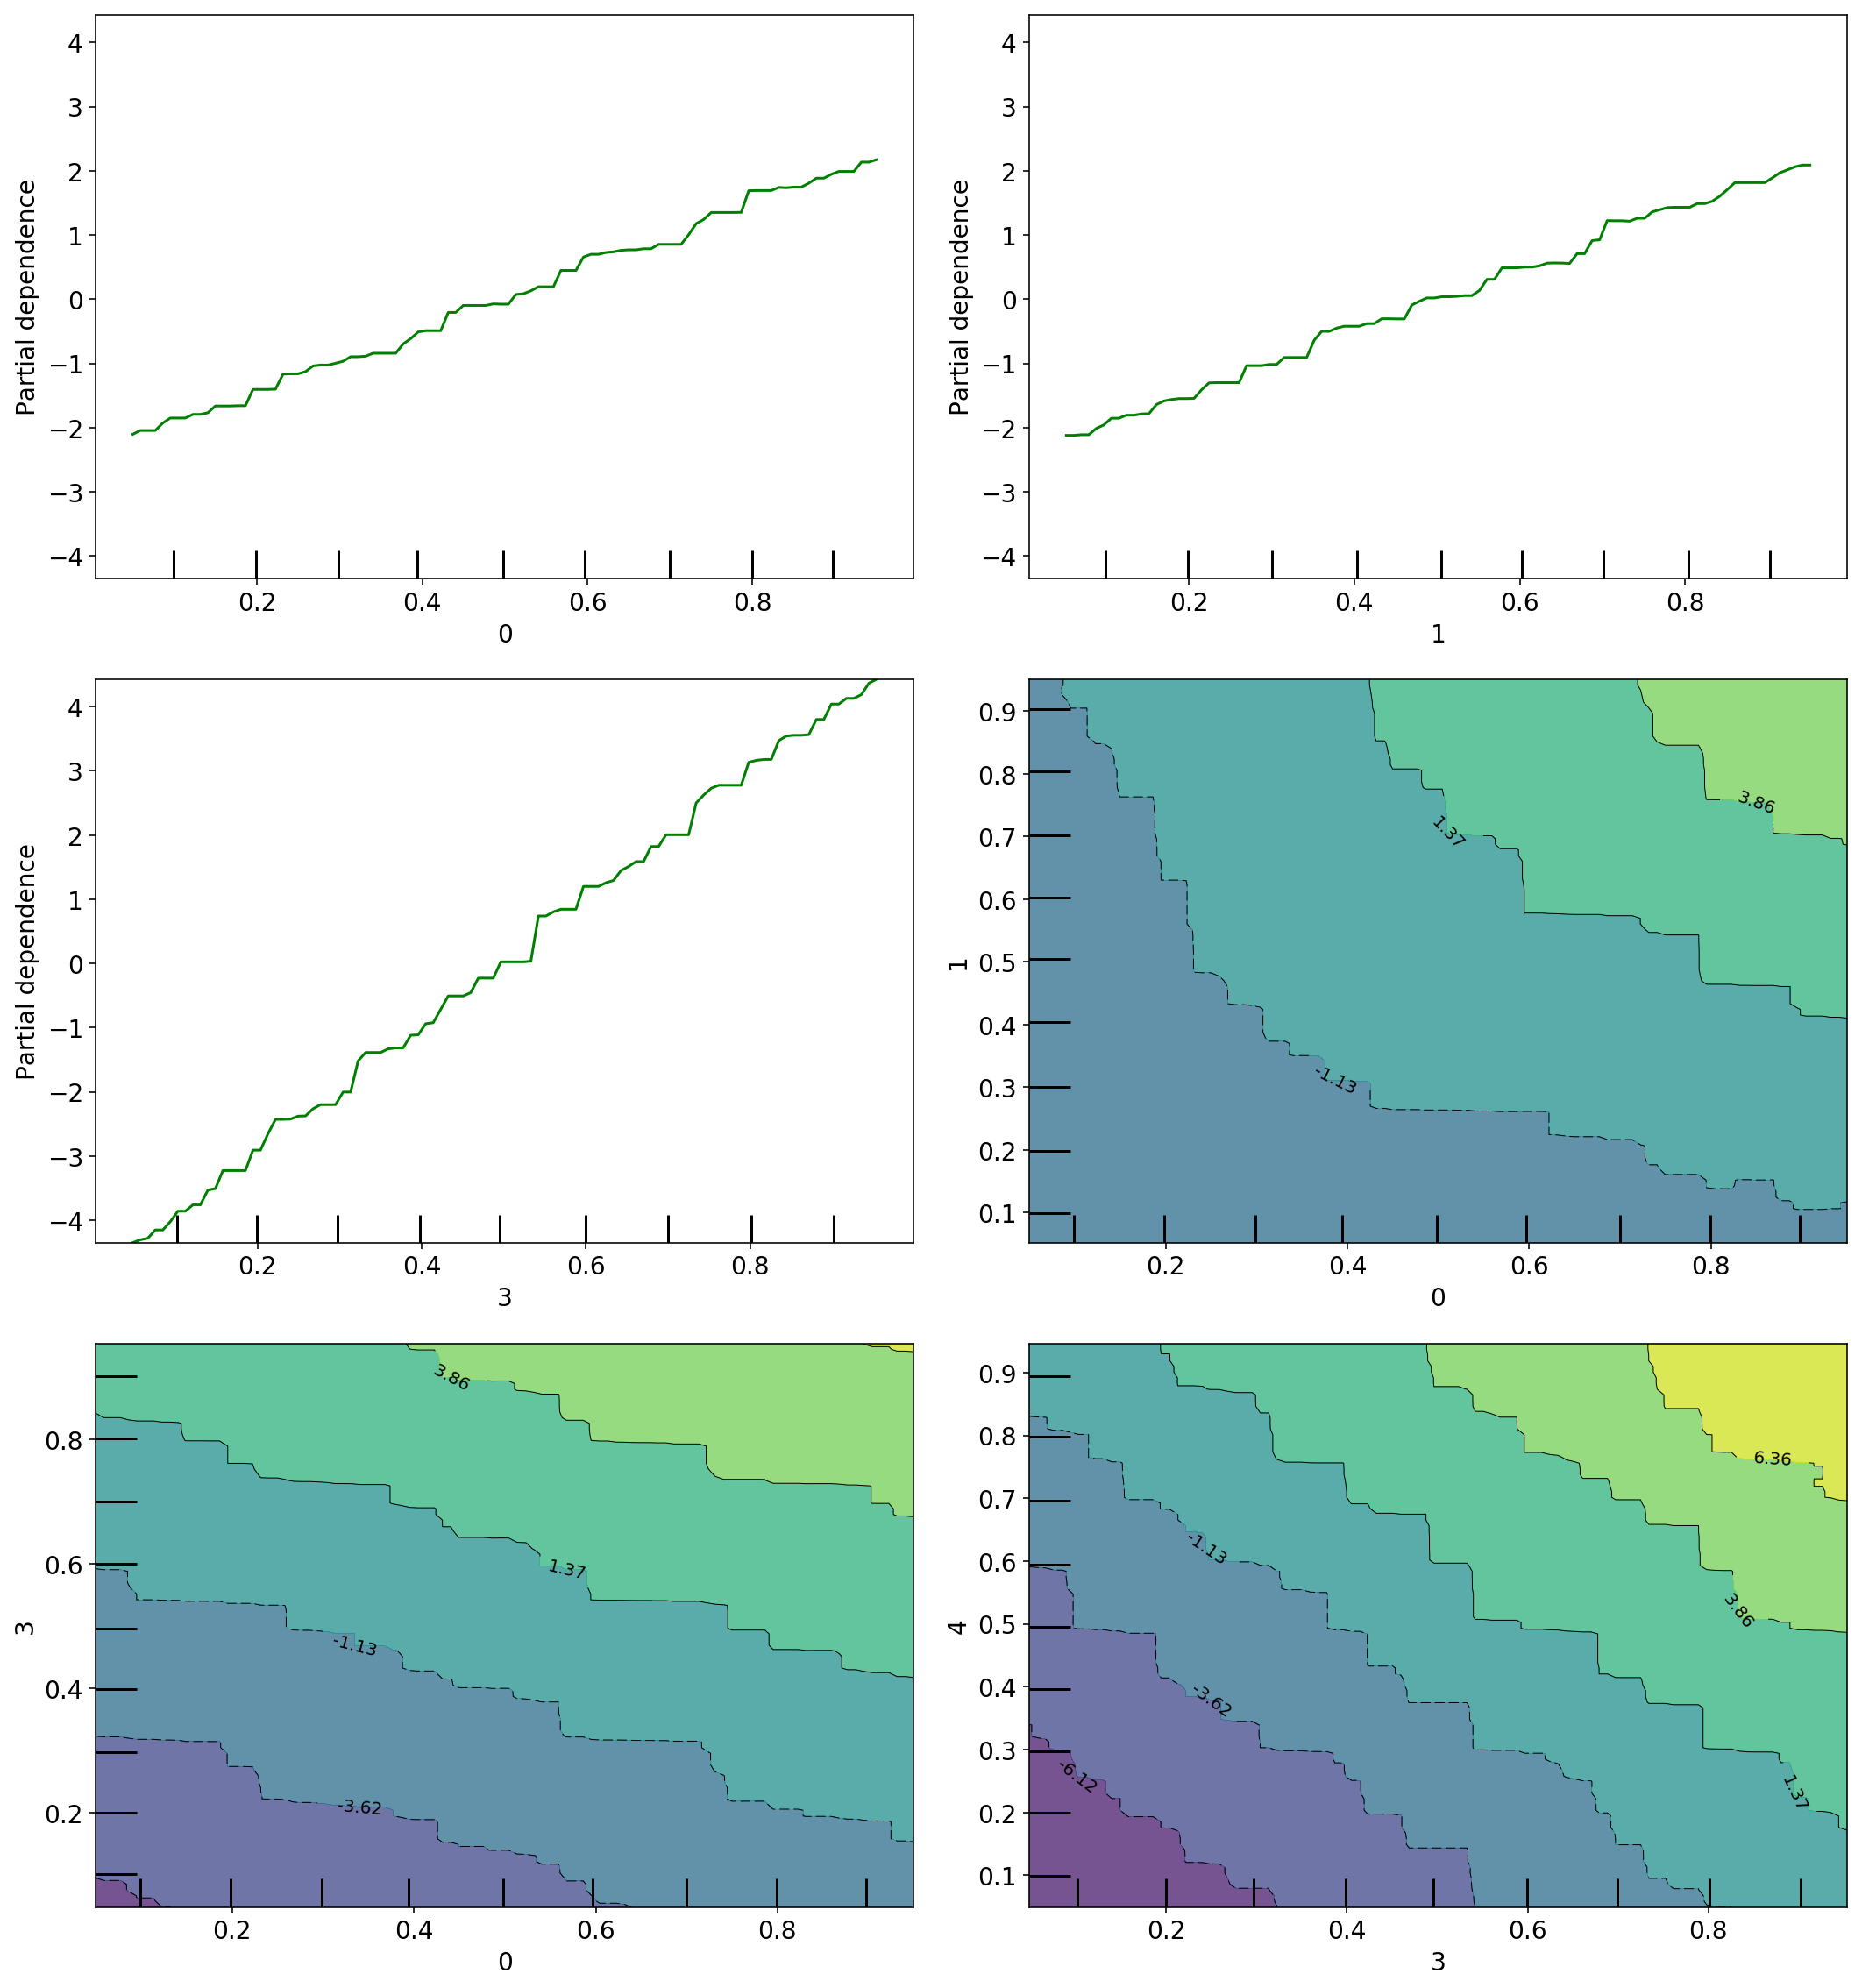

In [113]:
plot_partial_dependence(rgr, X, features=[0, 1, 3, (0, 1), (0, 3), (3, 4)], figsize=(15,16), n_cols=2)
plt.tight_layout();

#### How do the interactions between the features show up in the partial dependence plots?

Interactions show up in the 2D partial dependence plots as non-linear contour lines. In the bottom two plots (where the features are independent), the contour lines are fairly linear, indicating that the contribution of a given feature is fairly constant and independent of the other feature. In the first 2D plot (between features 0 and 1), the contour lines are noticeably non-linear. If either variable is close to zero, the contribution of the other one is quite low. Since we know the formula generating this data, we can see this makes sense: if either `X0` or `X1` gets close to `0`, then `10*X0*X1` will also tend towards `0` and will not influence the outcome `y`.

---

## (Bonus) Question 4

House prices in California. Use a gradient boosted regression tree model to build a model that can predict house prices in California (`GradientBoostingRegressor` is your friend).

Plot each of the features as a scatter plot with the target to learn about each variable. You can also make a plot of two features and use the target as colour.

Fit a model and tune the model complexity using a training and test data set.

Explore the feature importances and partial dependences that are important to the house price.

In [114]:
from sklearn.datasets.california_housing import fetch_california_housing

cal_housing = fetch_california_housing()

# if the above doesn't work, download `cal_housing_py3.pkl` from the GitHub repository
# and adjust the path to the downloaded file which is passed to `load()`
# uncomment the following lines
#from sklearn.externals.joblib import load
#d = load('/home/username/Downloads/cal_housing_py3.pkz')
#X, y = d[:,1:], d[:,0]/100000
#X[:, 2] /= X[:, 5]
#X[:, 3] /= X[:, 5]
#X[:, 5] = X[:, 4] / X[:, 5]

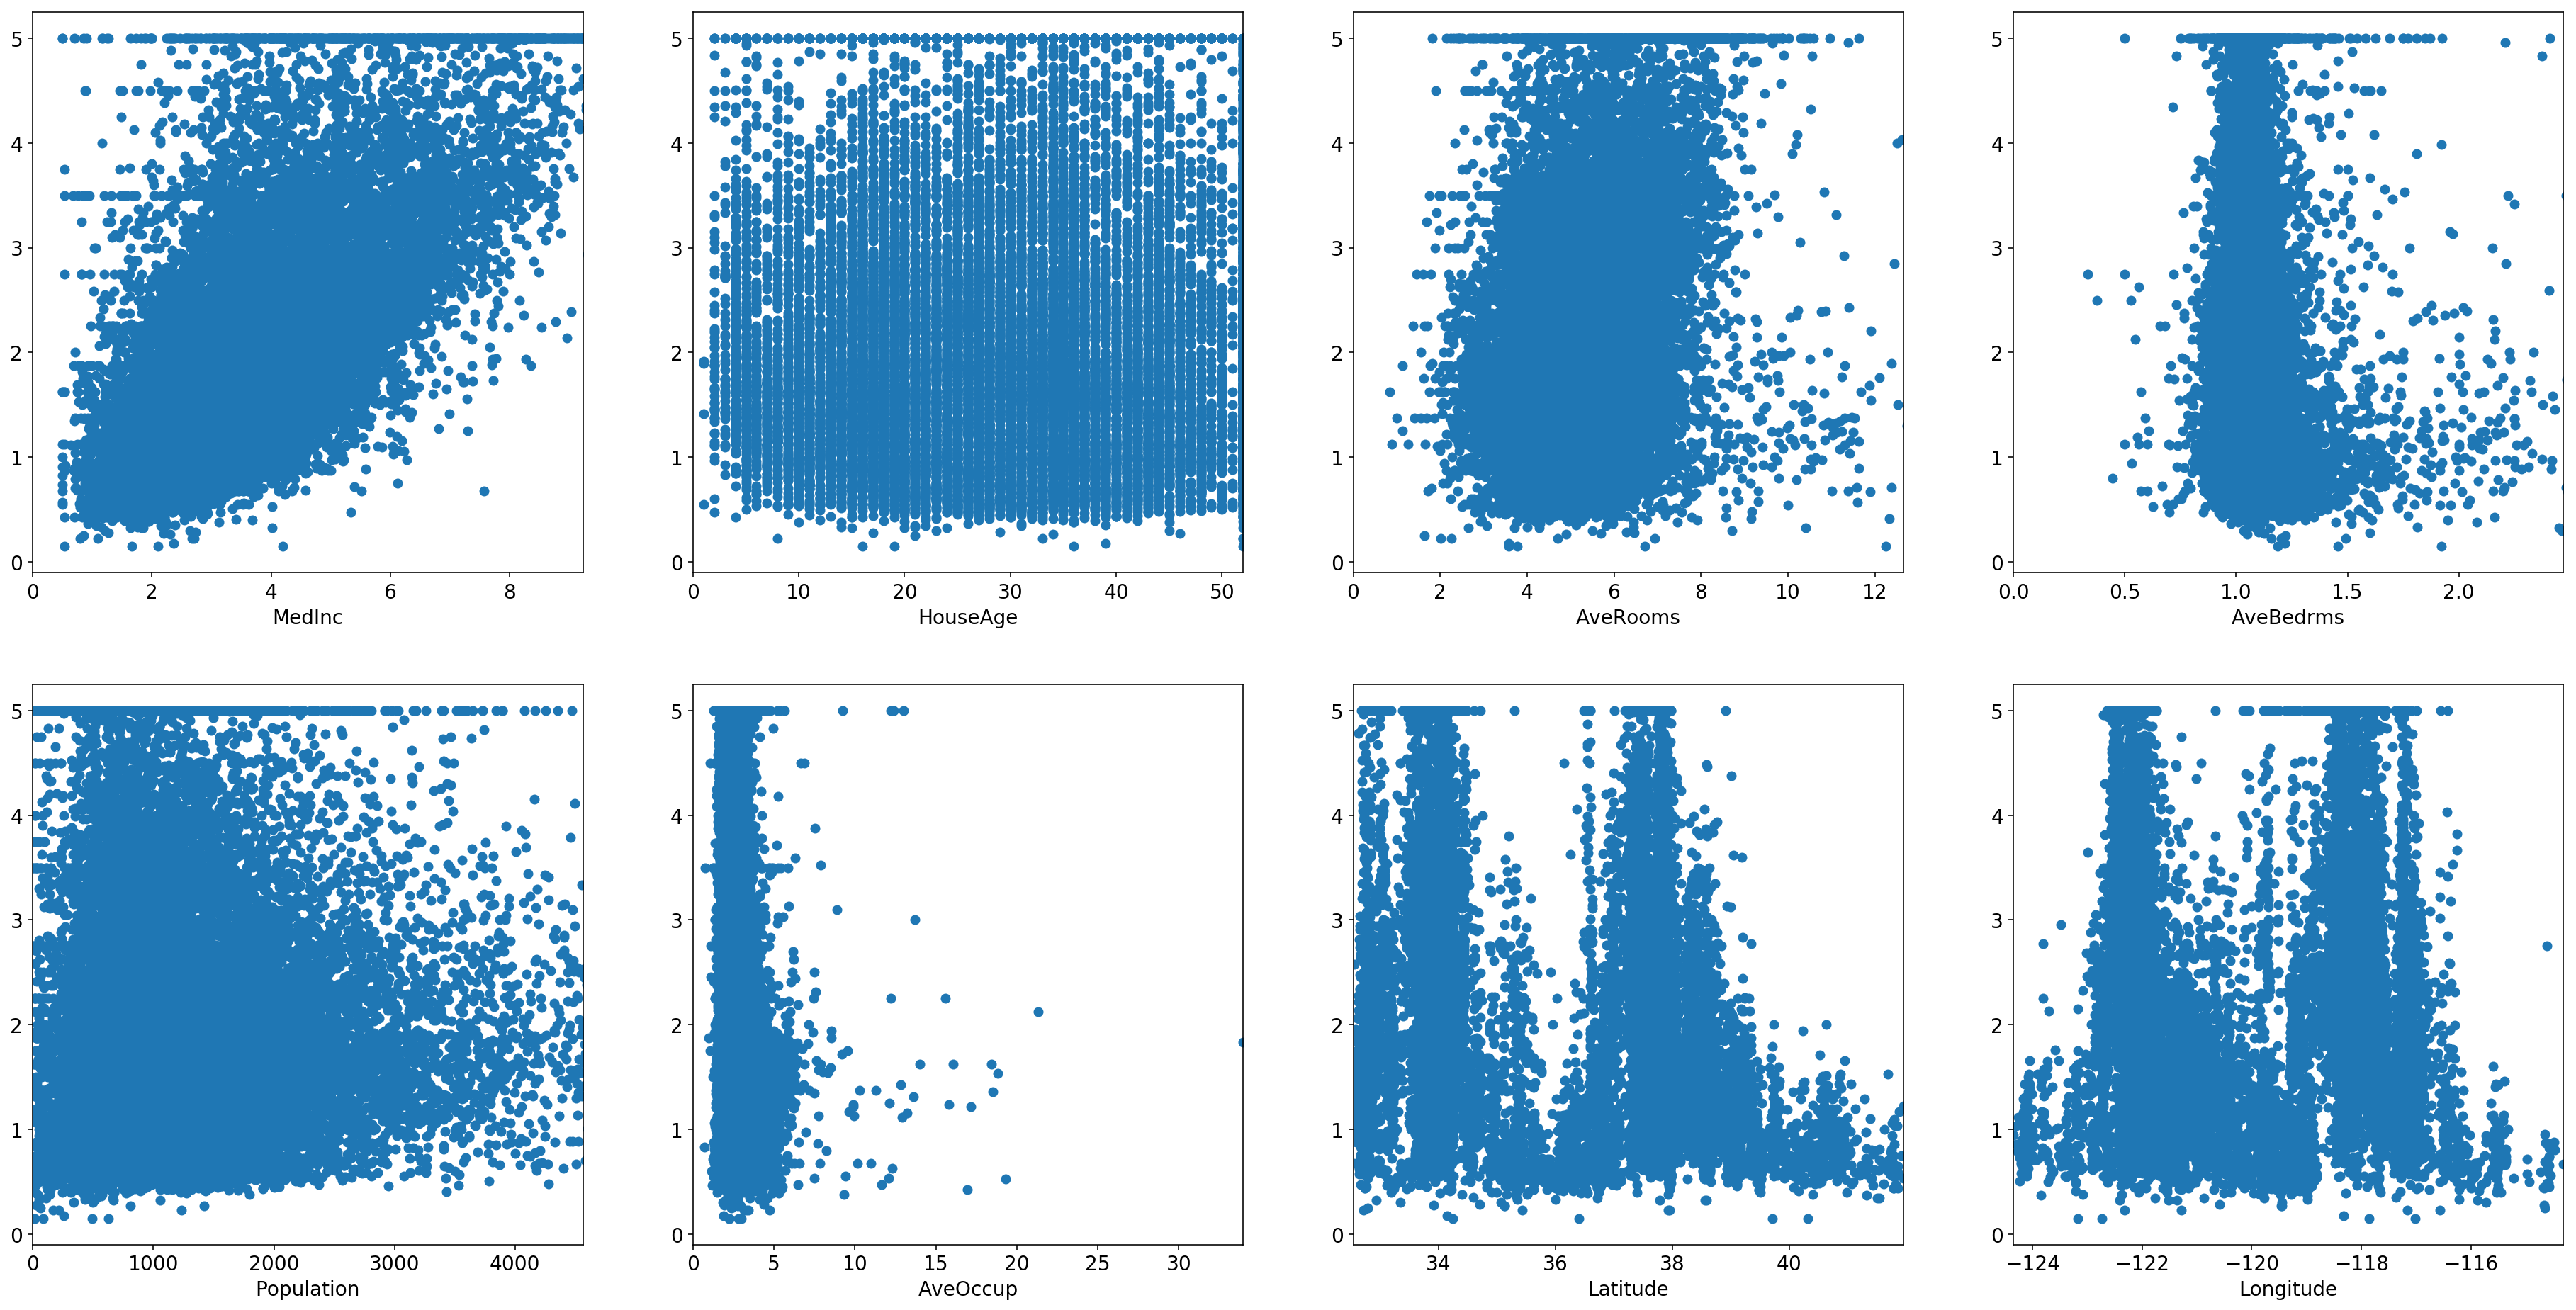

In [134]:
fig, axs = plt.subplots(2, 4, figsize=(4*8, 16))
for i in range(2):
    for j in range(4):
        axs[i,j].scatter(cal_housing.data[:,4*i+j], cal_housing.target)
        axs[i,j].set_xlabel(cal_housing.feature_names[4*i+j])
        axs[i,j].set_xlim(max(np.median(cal_housing.data[:,4*i+j])-3*np.std(cal_housing.data[:,4*i+j]), 0),
                min(np.median(cal_housing.data[:,4*i+j])+3*np.std(cal_housing.data[:,4*i+j]), max(cal_housing.data[:,4*i+j])))
axs[1,2].set_xlim(min(cal_housing.data[:,6]), max(cal_housing.data[:,6]))
axs[1,3].set_xlim(min(cal_housing.data[:,7]), max(cal_housing.data[:,7]));

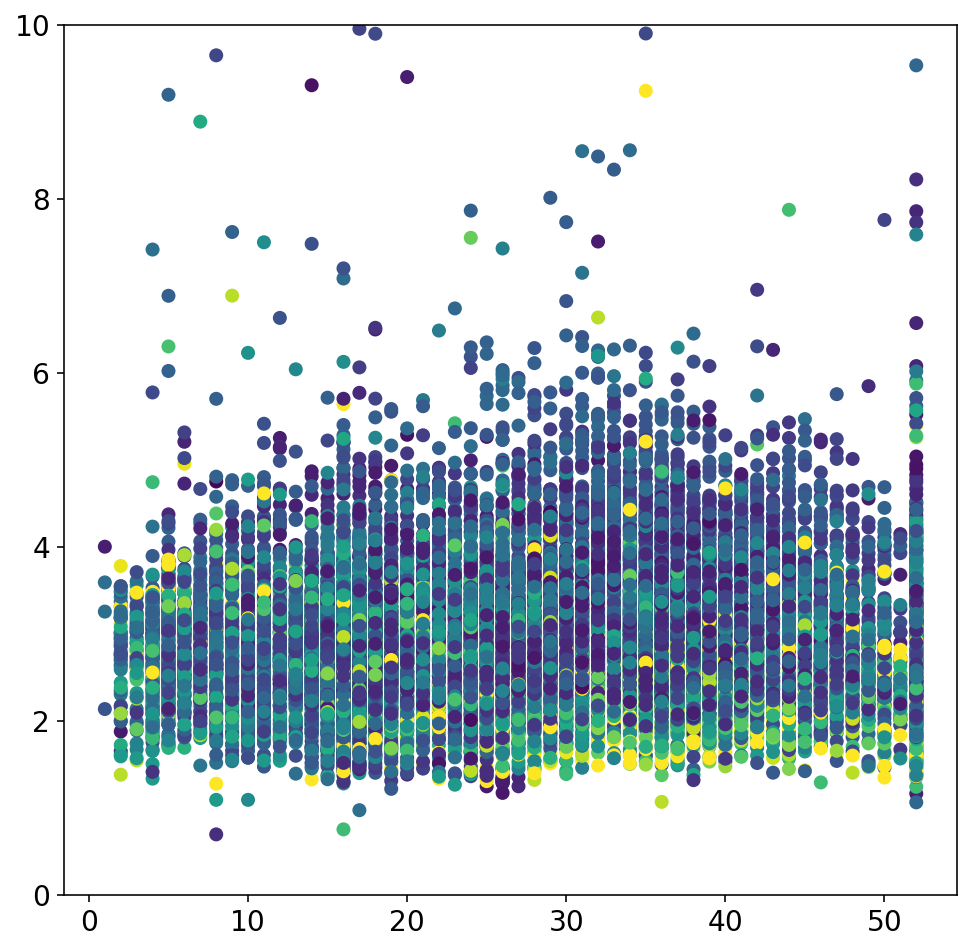

In [137]:
plt.scatter(cal_housing.data[:,1], cal_housing.data[:,5], c=cal_housing.target)
plt.ylim(0, 10);

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(cal_housing.data, cal_housing.target,
                                                    train_size=0.5, random_state=42)

rgr = GradientBoostingRegressor()